# ▒ 판별분석 ▒

## 0. 환경설정

In [50]:
import os
import numpy as np
import pandas as pd
import collections
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 준비

### Penguin dataset

- 펭귄에 대한 데이터
- species: 펭귄 종류 (Chinstrap, Adelie, Gentoo)
- island: 남극섬 종류
- bill_length_mm: culmen length (mm)
- bill_depth_mm: bill depth (mm)
- flipper_length_mm: 물갈퀴 길이 (mm)
- body_mass_g: 몸무게 (g)
- sex: 성별

In [70]:
penguins = sns.load_dataset('penguins')
print(penguins.shape)
penguins.head()

(344, 7)


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

### 데이터 전처리

- 수치형 설명변수 4개로 펭귄의 종을 예측하자. 
- 결측치는 평균값으로 대체한다.

In [53]:
penguins['bill_length_mm'].fillna(value=penguins['bill_length_mm'].mean(), inplace=True)
penguins['bill_depth_mm'].fillna(value=penguins['bill_depth_mm'].mean(), inplace=True)
penguins['flipper_length_mm'].fillna(value=penguins['flipper_length_mm'].mean(), inplace=True)
penguins['body_mass_g'].fillna(value=penguins['body_mass_g'].mean(), inplace=True)

penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen        39.10000       18.70000         181.000000   
1  Adelie  Torgersen        39.50000       17.40000         186.000000   
2  Adelie  Torgersen        40.30000       18.00000         195.000000   
3  Adelie  Torgersen        43.92193       17.15117         200.915205   
4  Adelie  Torgersen        36.70000       19.30000         193.000000   

   body_mass_g     sex  
0  3750.000000    MALE  
1  3800.000000  FEMALE  
2  3250.000000  FEMALE  
3  4201.754386     NaN  
4  3450.000000  FEMALE

### 데이터 분할
- 전체 데이터를 7:3으로 분할하여 각각 학습 데이터, 시험 데이터로 사용한다.

In [54]:
X = penguins[['bill_length_mm','bill_depth_mm',\
              'flipper_length_mm','body_mass_g']]
y = penguins.iloc[:,0]

In [55]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.3, random_state=123)

## 2. 탐색적 자료분석
- 설명변수별로 자료의 특성을 살펴본다.
- 설명변수들 사이의 관계를 파악하기 위해 시각화를 해본다.

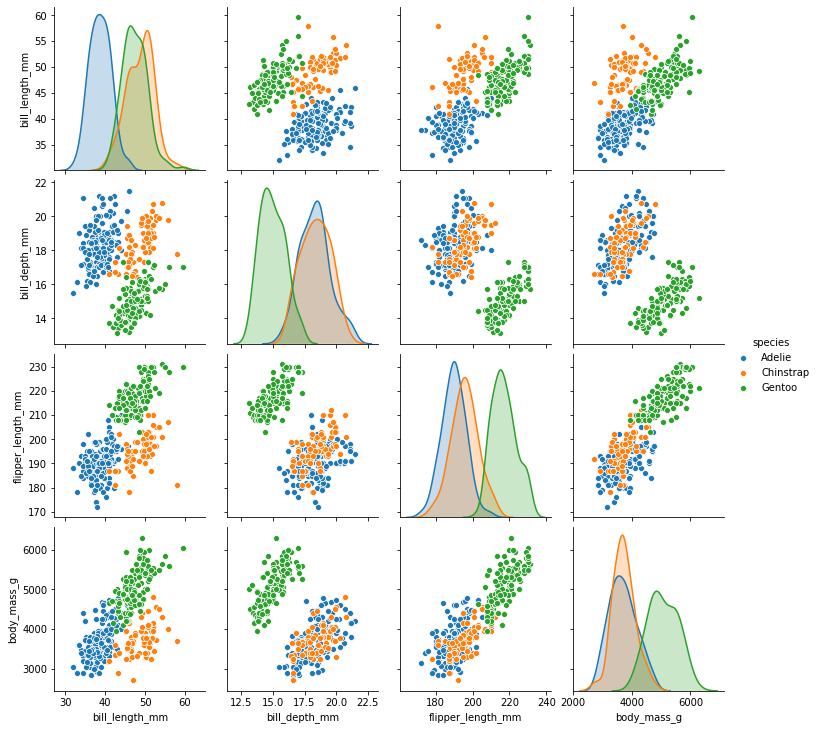

In [75]:
sns.pairplot(penguins, diag_kind='kde', hue='species')
plt.show()

## 3. 판별 분석
- LDA, QDA를 적합해보자.

### LDA (선형 판별 분석)
- LinearDiscriminantAnalysis 함수를 활용한다.
- 시험 자료에 적합하여 정분류율 및 confusion matrix를 구한다.

In [65]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [60]:
y_test_pred_lda = lda.predict(X_test)
confusion_matrix(y_test, y_test_pred_lda)

array([[47,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 36]])

In [61]:
lda.score(X_test, y_test)

1.0

### QDA
- QuadraticDiscriminantAnalysis 함수를 활용한다.
- 시험 자료에 적합하여 정분류율 및 confusion matrix를 구한다.

In [62]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [63]:
y_test_pred_qda = qda.predict(X_test)
confusion_matrix(y_test, y_test_pred_qda)

array([[47,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 36]])

In [64]:
qda.score(X_test, y_test)

1.0